In [10]:
import os
import sys
# CaLRepo = os.environ.get("CaLRepo")
CaLRepo ='/home/anoldfriend/Workspace/MyRepo/thermodynamics/CaL'
# print(CaLRepo)
sys.path.append(f"{CaLRepo}/utilities/")

import numpy as np
import pandas as pd
import proplot as pplot
import matplotlib.pyplot as plt

from pyCaLAnalysis import CaLAnalyser

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
flue_gas_composition={}
flue_gas_composition["co2"]=0.1338
flue_gas_composition["o2"]=0.0384
flue_gas_composition["n2"]=0.6975 
parameters={}
parameters["flue_gas_composition"]=flue_gas_composition
parameters["vol_rate_flue_gas"]=6000/3600
parameters["decarbonized_rate"]=0.9
parameters["T_flue_gas"]=40
parameters["T_carb"]=650
parameters["T_calc"]=900
parameters["cao_conversion"]=0.5
parameters["T_water_reactor_out"]=80

ca=CaLAnalyser(parameters)


gen|  eval  |    f_opt    |    f_max    |    f_avg    |    f_min    |    f_std    
----------------------------------------------------------------------------------
 0 |   30   | 9.00202E-01 | 9.00202E-01 | 4.30373E-01 | -8.83635E-01| 3.76071E-01 
 1 |   60   | 9.00202E-01 | 9.00202E-01 | 4.18725E-01 | -8.83635E-01| 4.07304E-01 
 2 |   90   | 9.64055E-01 | 9.64055E-01 | -5.02413E+03| -1.30642E+05| 2.51235E+04 
 3 |  120   | 9.64055E-01 | 9.64055E-01 | -4.50425E+03| -1.30642E+05| 2.38378E+04 
 4 |  150   | 9.64055E-01 | 9.64055E-01 | 7.12610E-01 | 7.67568E-02 | 2.00374E-01 
 5 |  180   | 9.64055E-01 | 9.64055E-01 | 7.45950E-01 | 7.67568E-02 | 1.80682E-01 
 6 |  210   | 9.64055E-01 | 9.64055E-01 | 7.96984E-01 | 5.37431E-01 | 1.17978E-01 
 7 |  240   | 9.64055E-01 | 9.64055E-01 | 8.13351E-01 | 3.00941E-01 | 1.38432E-01 
 8 |  270   | 9.75851E-01 | 9.75851E-01 | 8.54905E-01 | 5.37431E-01 | 1.07021E-01 
 9 |  300   | 9.75851E-01 | 9.75851E-01 | 9.02650E-01 | 7.10418E-01 | 5.83742E-02 
 10|

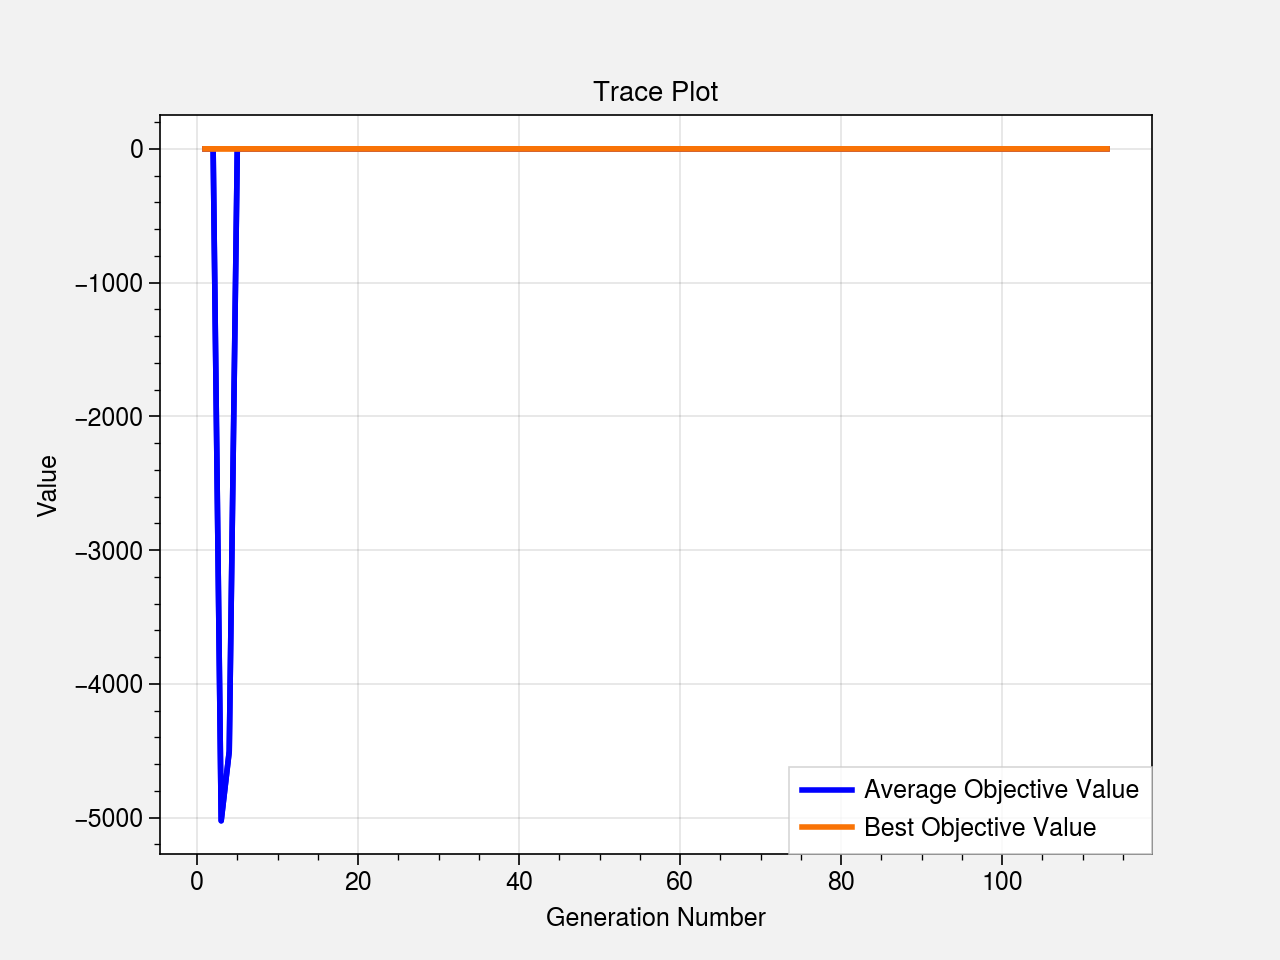

Execution time: 75.99888324737549 s
Evaluation number: 3390
The best objective value is: 0.9907618621601452
The best variables are: 
623.7142444510459	634.999739170044	24.136381191960833	


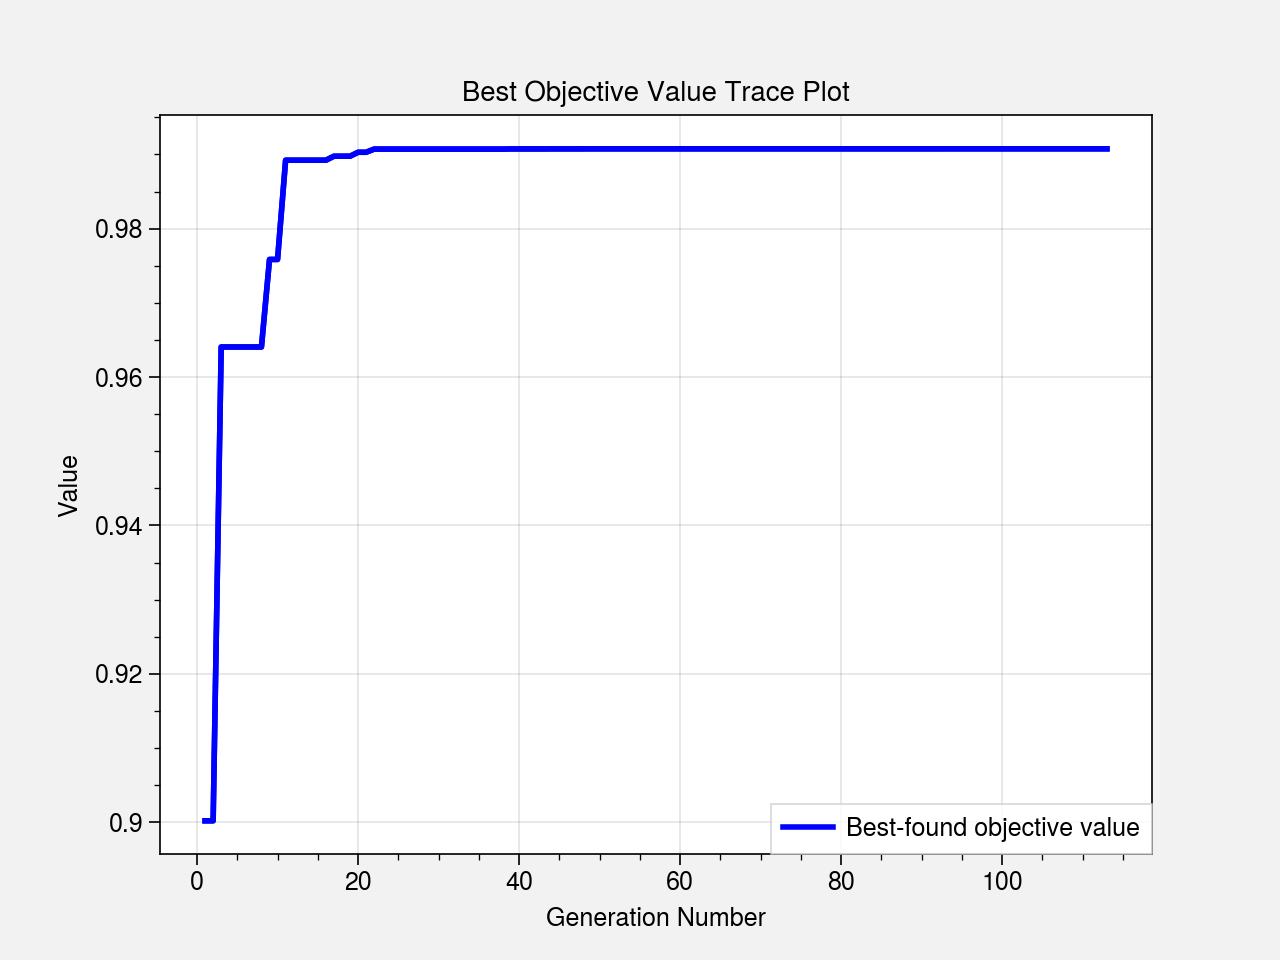

carbonator optimation results: {'success': True, 'stopMsg': 'The algotirhm stepped because it exceeded the trapped count limit.', 'optPop': <geatpy.Population.Population object at 0x7f50e1cd77c0>, 'lastPop': <geatpy.Population.Population object at 0x7f50e1cd7730>, 'Vars': array([[623.71424445, 634.99973917,  24.13638119]]), 'ObjV': array([[0.99076186]]), 'CV': array([[-0.01320597]]), 'executeTime': 75.99888324737549, 'nfev': 3390, 'startTime': '2022-05-21 17h-24m-12s', 'endTime': '2022-05-21 17h-25m-30s'}


/home/anoldfriend/Workspace/MyRepo/thermodynamics/CaL/.venv/lib/python3.8/site-packages/scipy/optimize/_minimize.py:852: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "


{'carb': {'T_flue_gas_reactor_in': 623.7142444510459, 'T_cao_reactor_in': 634.999739170044, 'T_water_reactor_in': 24.136381191960833, 'flue_gas_composition': {'co2': 0.15384615384615385, 'n2': 0.8020006898930666, 'o2': 0.04415315626077957}, 'deconbonized_rate': 0.9, 'vol_rate_flue_gas': 1.6666666666666667, 'T_carb': 650, 'p_amb': 101325, 'T_amb': 20, 'T_delta_pinch': 15, 'T_flue_gas_in': 40, 'p_flue_gas_in': 101325, 'T_decarbonized_flue_gas_out': 40, 'T_water_reactor_out': 80, 'p_carb': 105546.875, 'p_water': 101325, 'cao_conversion': 0.5, 'deconbonized_flue_gas_composition': {'co2': 0.017857142857142853, 'n2': 0.9308936579115951, 'o2': 0.051249199231262005}, 'm_flue_gas_in': 1.9890714221113102, 'm_water_in': 6.337292967784076, 'm_co2_capture': 0.3969355309823837, 'm_cao_in': 1.0103813515915223, 'm_deconbonized_flue_gas_out': 1.5921358911289265, 'm_cao_unr_out': 0.5051906757957612, 'm_caco3_out': 0.9021262067781448, 'delta_H_Tcarb': -174356.10729982323, 'p_flue_gas_compressor_out': 109

In [3]:
plant_results=ca.solve()
print(plant_results)

(-1.1049186801828754,
 1.1002342228658513,
 -1.1075361751420305,
 1.1070719267496314)

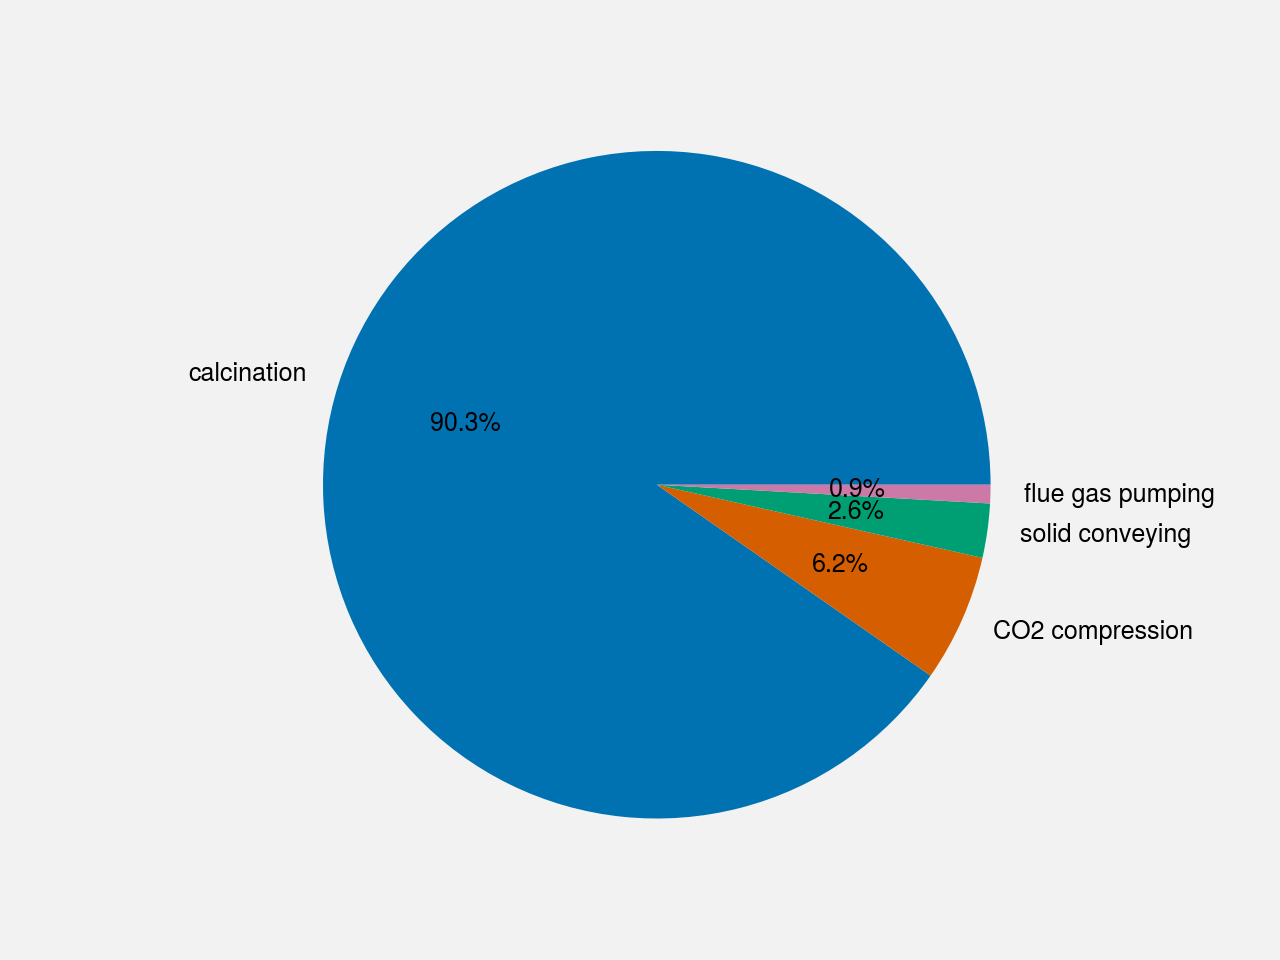

In [20]:
powers={}
powers["calcination"]=plant_results["calc"]["We_calc"]
powers["CO2 compression"]=plant_results["calc"]["compressor_power"]*(-1)
powers["solid conveying"]=plant_results["calc"]["conveying_power"]*(-1)- \
    plant_results["carb"]["conveying_power"]
# powers["cooling"]=plant_results["calc"]["cooling_power"]*(-1)- \
#     plant_results["carb"]["cooling_power"]*(-1)
powers["flue gas pumping"]=plant_results["carb"]["flue_gas_compressor_power"]*(-1)
fig1, ax1 = plt.subplots()

ax1.pie(powers.values(), labels=powers.keys(), autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.



In [6]:
analysis_results=ca.analyze(plant_results)
analysis_results

{'total_power': 1846507.794726185,
 'Q_hot_water': 1590964.4888209982,
 'heat_storage_eff': 0.8616072422574957,
 'total_sep_power': 59738.18972983315,
 'sep_eff1': 0.03790004261409256,
 'sep_eff2': 0.04085223119509879}

In [5]:
# comps={"co2":0.1539,"n2":0.8461}
# rate=0.9
# T=35
# ca.specific_seperation_power(T,comps,rate)